In [1]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

In [2]:
W = 1.5 #um(10**-6m)

def Factorial(n):
    f=1
    for i in range(1,n+1,1):
        f*=i 
    return f

def Laguerre(rho,l,p):
    l = np.abs(l)
    L = 0
    for m in range(p+1):
        L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
    return L

def f(rho,l,p):
    l = np.abs(l)
    f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
    return f 
    
def u(phi,rho,l,p):
    u = f(rho,l,p) * np.exp(complex(0,1)*l*phi)
    return u

def ux(phi,rho,l1,l2,p,beta,alpha):
    ux = (1*np.cos(beta/2)*u(phi,rho,l1,p) +1*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)
    return ux

def uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uy = complex(0,1)*( sigma1*np.cos(beta/2)*u(phi,rho,l1,p)  +sigma2*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)  
    return uy

def uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uin = np.sqrt( np.abs(ux(phi,rho,l1,l2,p,beta,alpha))**2 + np.abs(uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha))**2 )
    return uin


$\text{for}\;\sigma\,=\,-\sigma^{'}\,=\,1\;,\,l\,=\,-l^{'}\,=\,1$

$\vec{A}^{\;\sigma\,,\,l\,,\,\sigma^{'}\,,\,l^{'}}\;=\,\cos(\frac{\beta}{2})\,\vec{A}^{\;\sigma\,,\,l}_{(\vec{\rho})}\,+\,e^{\,i\,\alpha}\,\sin(\frac{\beta}{2})\,\vec{A}^{\;\sigma^{'}\,,\,l^{'}}_{(\vec{\rho})}$

In [3]:
#數值設定
#綠光波長:530nm  
c=300            #光速       Mm/s (10**6)
w=3.56           #綠光角頻率 peta Hz (10**15)      >t(ps)
k=11.9           #波向量     um^(-1)               >z(um)
T=2*np.pi/w      #週期      femto s (10**-15)
Lambda=530       #波長       nm

# 1 um  =  1000 nm
# 1 um-1 = 0.001nm-1

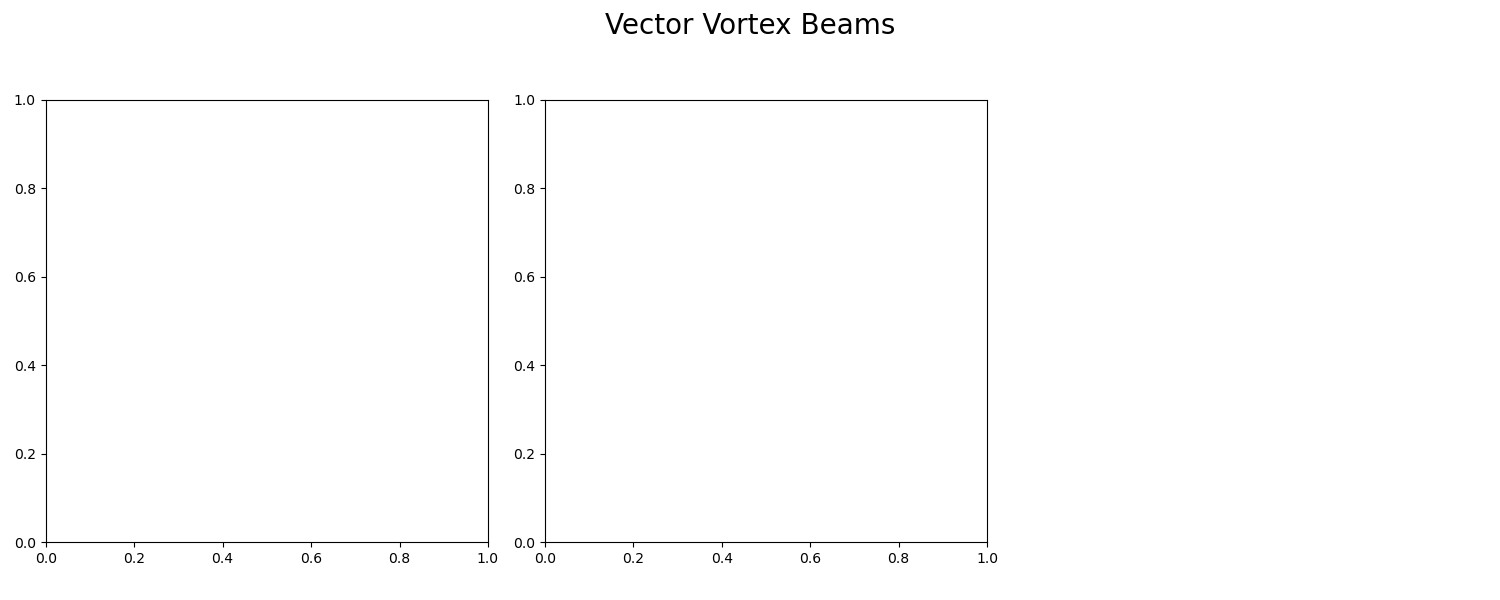

Output()

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
fig.delaxes(ax[2])

beta = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='alpha (pi)')
t = np.arange(0, 2*np.pi, 0.02)
# rho = np.linspace(0, 2*W, 200)
# phi = np.linspace(0, 2*np.pi, 200)
# rho, phi = np.meshgrid(rho, phi)
# X, Y = rho*np.cos(phi), rho*np.sin(phi)
l1 = widgets.IntText(value=-1, min=0, max=10, step=1, description='l:', disabled=False)
l2 = widgets.IntText(value=1, min=0, max=10, step=1, description='l\':', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
sigma1 = 1
sigma2 = -1
# R = 4 #um
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')

def need(l1,l2,p,beta,alpha):
    beta = beta*np.pi
    alpha = alpha*np.pi
    ax[0].cla()
    ax[1].cla()

    for i in np.linspace(0,2*np.pi,9):
        for R in np.linspace(W/2,2*W,4,endpoint=True):
            x = R*np.cos(i)
            y = R*np.sin(i)
            a = ux(i,R,l1,l2,p,beta,alpha) 
            b = uy(i,R,sigma1,sigma2,l1,l2,p,beta,alpha) 
            ax[0].plot(x+a* np.exp(-complex(0,1)*w*t),y+b* np.exp(-complex(0,1)*w*t),linestyle=':',color="gray") 
            ax[0].arrow(float(x+a * np.exp(-complex(0,1)*w*t[-5])) , float(y+b * np.exp(-complex(0,1)*w*t[-5])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5]))) , float(b * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5])))  ,
                        width=0.03,color="k" )  
            ax[0].arrow(float(x+a * np.exp(-complex(0,1)*w*t[0])) , float(y+b * np.exp(-complex(0,1)*w*t[0])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0]))) , float(b * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0])))  ,
                        width=0.03,color="k" )

    ax[0].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 
    print('alpha=',format(alpha/np.pi,'.3f'),'𝜋 beta=',format(beta/np.pi,'.3f'),'𝜋' )

    # ax[1].contourf(X, Y, uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha), levels=np.linspace(0,0.7,100), cmap='gist_yarg' )
    # ax[1].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 

    ax[0].legend()
    ax[0].set_title('real space polarization')
    ax[0].set_xlabel('x (um)')
    ax[0].set_ylabel('y (um)')
    ax[0].set_xlim(-2*W,2*W)
    ax[0].set_ylim(-2*W,2*W)
    ax[0].annotate('beta='+str(format(beta/np.pi,'.2f'))+'$\pi$ alpha='+str(format(alpha/np.pi,'.2f'))+'$\pi$' , xy=(-1.9*W, -1.95*W), fontsize=12.5)
    ax[1].set_title('real space intensity')
    ax[1].set_xlabel('x (um)')
    ax[1].set_ylabel('y (um)')
    ax[1].set_xlim(-2*W,2*W)
    ax[1].set_ylim(-2*W,2*W)

plt.suptitle('Vector Vortex Beams' ,fontsize=20)
# plt.colorbar(ax[1].contourf(X, Y, uintensity(phi,rho,sigma1,sigma2,0,0,0,0,0), levels=np.linspace(0,0.7,100), cmap='gist_yarg'),  ax=ax[2], ticks=np.linspace(0,0.7, 5), location='left')    
plt.tight_layout(pad=1)
plt.show()

out = widgets.interactive_output(need, {'l1':l1, 'l2':l2, 'p':p, 'beta':beta, 'alpha':alpha})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l1,l2,p]), widgets.Label('parameter:'), widgets.HBox([beta,alpha]) ])
display(ui , out )


# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令

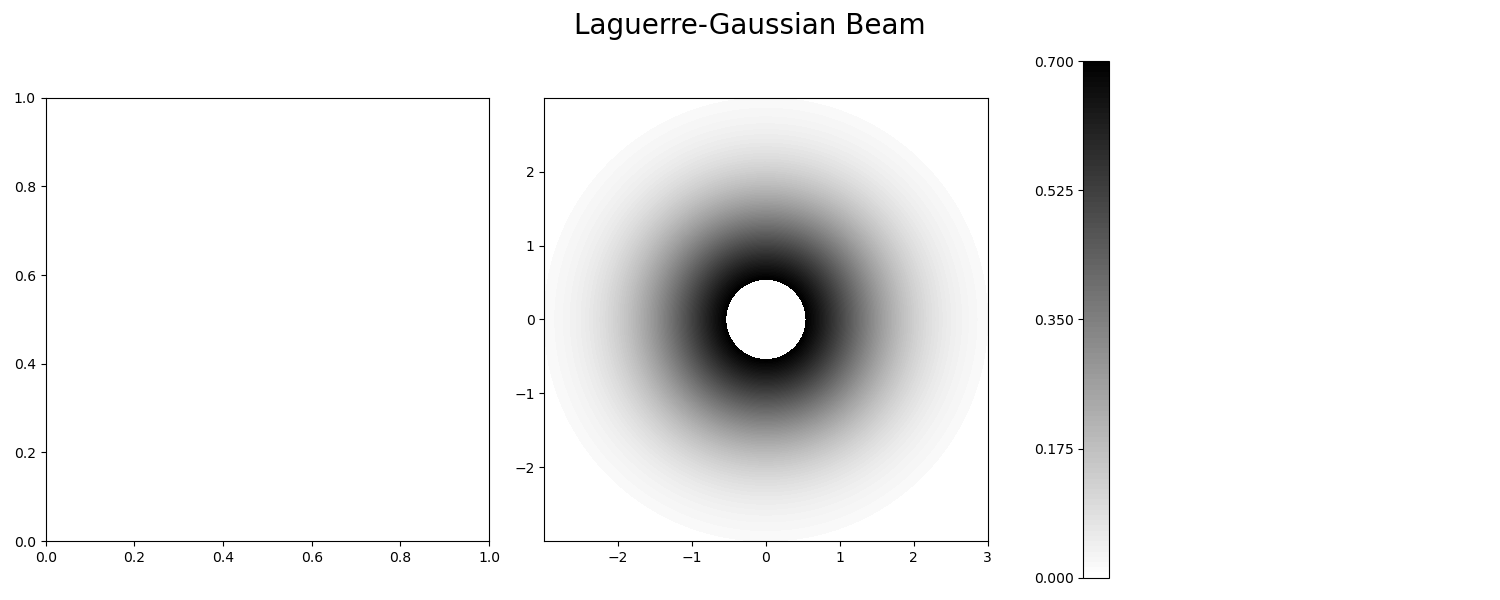

Output()

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
fig.delaxes(ax[2])


beta = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='alpha (pi)')
# thetax = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='theta x (pi)')
# thetay = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='theta y (pi)')
t = np.arange(0, 2*np.pi, 0.02)
rho = np.linspace(0, 2*W, 200)
phi = np.linspace(0, 2*np.pi, 200)
rho, phi = np.meshgrid(rho, phi)
X, Y = rho*np.cos(phi), rho*np.sin(phi)
l = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')

def need(l,p,beta,alpha):
    ax[0].cla()
    ax[1].cla()
    beta = beta*np.pi
    alpha = alpha*np.pi
    # norm = np.sqrt( np.abs(np.exp(complex(0,1)*thetax))**2 + np.abs(np.exp(complex(0,1)*thetay))**2 )
    for i in np.linspace(0,2*np.pi,9):
        for R in np.linspace(W/2,2*W,4,endpoint=True):
            x = R*np.cos(i)
            y = R*np.sin(i)
            # a = np.exp(complex(0,1)*thetax)*u(i,R,l,p)/norm
            # b = np.exp(complex(0,1)*thetay)*u(i,R,l,p)/norm
            a = np.cos(beta/2)*u(i,R,l,p)/np.sqrt(2)
            b = np.sin(beta/2)*np.exp(complex(0,1)*alpha)*u(i,R,l,p)/np.sqrt(2)
            ax[0].plot(x+a* np.exp(-complex(0,1)*w*t),y+b* np.exp(-complex(0,1)*w*t),linestyle=':',color="gray") 
            ax[0].arrow(float(x+a * np.exp(-complex(0,1)*w*t[-5])) , float(y+b * np.exp(-complex(0,1)*w*t[-5])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5]))) , float(b * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5])))  ,
                        width=0.01,color="k" )  
            ax[0].arrow(float(x+a * np.exp(-complex(0,1)*w*t[0])) , float(y+b * np.exp(-complex(0,1)*w*t[0])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0]))) , float(b * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0])))  ,
                        width=0.01,color="k" )
            
        
        
    ax[1].contourf(X, Y, np.abs(u(phi,rho,l,p)), levels=np.linspace(0,0.7,100), cmap='gist_yarg' )
        
    ax[0].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 
    ax[1].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 
    ax[0].legend()
    ax[0].set_title('real space polarization, l = '+str(l))
    ax[0].set_xlabel('x (um)')
    ax[0].set_ylabel('y (um)')
    ax[0].set_xlim(-2*W,2*W)
    ax[0].set_ylim(-2*W,2*W)
    ax[1].set_title('real space intensity')
    ax[1].set_xlabel('x (um)')
    ax[1].set_ylabel('y (um)')
    ax[1].set_xlim(-2*W,2*W)
    ax[1].set_ylim(-2*W,2*W)
    
plt.suptitle('Laguerre-Gaussian Beam' ,fontsize=20)
plt.colorbar(ax[1].contourf(X, Y, np.abs(u(phi,rho,0,0)), levels=np.linspace(0,0.7,100), cmap='gist_yarg'),  ax=ax[2], ticks=np.linspace(0,0.7, 5), location='left')    
plt.tight_layout(pad=1)
plt.show()

out = widgets.interactive_output(need, {'l':l, 'p':p, 'beta':beta, 'alpha':alpha})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l,p]), widgets.Label('parameter:'), widgets.HBox([beta,alpha])])
display(ui , out )


# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令

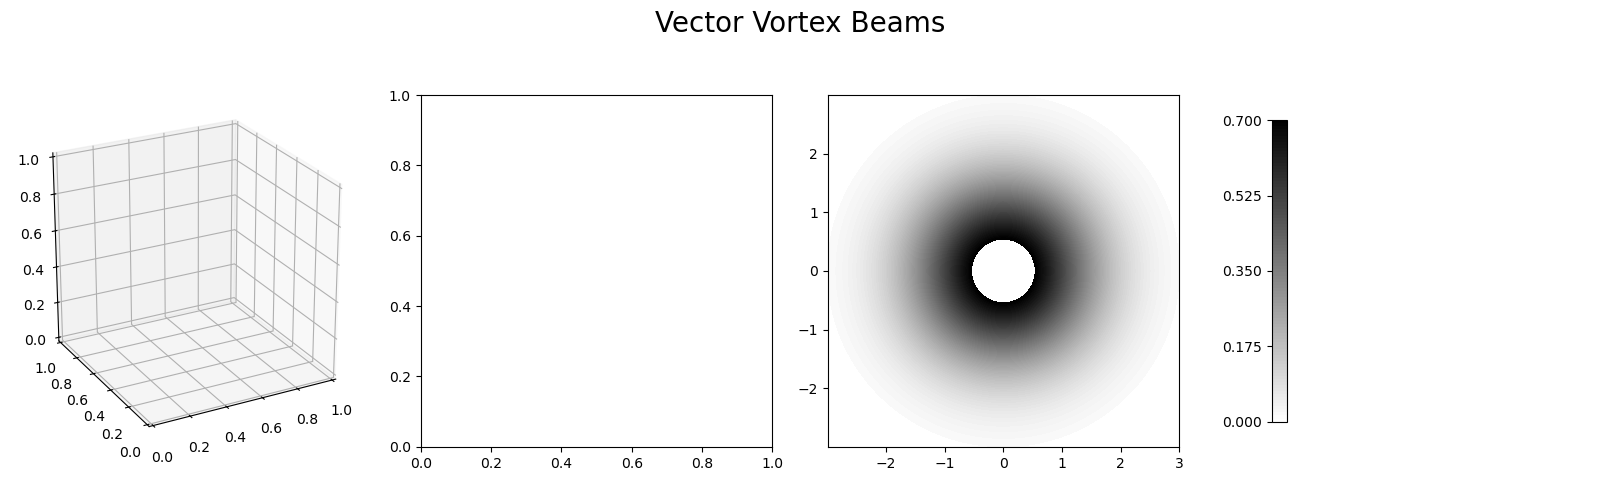

Output()

In [9]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
ax3D = fig.add_subplot(1, 4, 1, projection='3d')
fig.delaxes(ax[0])
fig.delaxes(ax[3])

beta = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='alpha (pi)')
t = np.arange(0, 2*np.pi, 0.02)
rho = np.linspace(0, 2*W, 200)
phi = np.linspace(0, 2*np.pi, 200)
rho, phi = np.meshgrid(rho, phi)
X, Y = rho*np.cos(phi), rho*np.sin(phi)
l1 = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
l2 = widgets.IntText(value=-1, min=0, max=10, step=1, description='l\':', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
sigma1 = 1
sigma2 = -1

ax3D.set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[2].set_aspect('equal', adjustable='box')

U, V = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
wx = np.cos(U) * np.sin(V)
wy = np.sin(U) * np.sin(V)
wz = np.cos(V)

o = np.linspace(0,2*np.pi,30, endpoint=True)
c = np.linspace(0, np.pi,15, endpoint=True)

def need(l1,l2,p,beta,alpha):
    beta = beta*np.pi
    alpha = alpha*np.pi
    ax3D.cla()
    ax[1].cla()
    ax[2].cla()

    ax3D.plot_wireframe(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.15])
    ax3D.plot_surface(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.05])
    
    qx =1*np.cos(alpha) * np.sin(beta)
    qy =1*np.sin(alpha) * np.sin(beta)
    qz =1*np.cos(beta)
    ax3D.quiver(0, 0, 0, qx, qy, qz, color=[0.547, 0.152, 0.996])
    ax3D.quiver(0, 0, 0, 0.3, 0, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0.3, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0, 0.3, color='k')

    ax3D.plot(np.sin(beta)*np.cos(o), np.sin(beta)*np.sin(o), np.cos(beta)+(o*0) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    ax3D.plot(np.sin(c)*np.cos(alpha), np.sin(c)*np.sin(alpha), np.cos(c) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    

    for i in np.linspace(0, 2*np.pi, 9, endpoint=True):
        for R in np.linspace(W/2, 2*W, 4 ,endpoint=True):
            x = R*np.cos(i)
            y = R*np.sin(i)
            a = ux(i,R,l1,l2,p,beta,alpha) 
            b = uy(i,R,sigma1,sigma2,l1,l2,p,beta,alpha) 
            ax[1].plot(x+a* np.exp(-complex(0,1)*w*t),y+b* np.exp(-complex(0,1)*w*t),linestyle=':',color="gray") 
            ax[1].arrow(float(x+a * np.exp(-complex(0,1)*w*t[-5])) , float(y+b * np.exp(-complex(0,1)*w*t[-5])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5]))) , float(b * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5])))  ,
                        width=0.03,color="k" )  
            ax[1].arrow(float(x+a * np.exp(-complex(0,1)*w*t[0])) , float(y+b * np.exp(-complex(0,1)*w*t[0])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0]))) , float(b * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0])))  ,
                        width=0.03,color="k" )

    ax[1].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 
    print('alpha=',format(alpha/np.pi,'.3f'),'𝜋 beta=',format(beta/np.pi,'.3f'),'𝜋' )

    ax[2].contourf(X, Y, uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha), levels=np.linspace(0,0.7,100), cmap='gist_yarg' )
    ax[2].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 

    
    ax3D.text2D(0.05, 0.95, 'Poincaré sphere \nbeta='+str(format(beta/np.pi,'.2f'))+'$\pi$ alpha='+str(format(alpha/np.pi,'.2f'))+'$\pi$', transform=ax3D.transAxes)
    ax3D.text(0.3, 0, 0, "$\hat{x}$", color='k')
    ax3D.text(0, 0.3, 0, "$\hat{y}$", color='k')
    ax3D.text(0, 0, 0.3, "$\hat{z}$", color='k')
    ax3D.text(0, 0, 1.2, "|$\sigma\,="+str(sigma1)+",\,l\,$⟩", color='k',fontsize=9)
    ax3D.text(0, 0, -1.3, "|$\sigma^{'}\,="+str(sigma2)+",\,l^{'}\,$⟩", color='k',fontsize=9)
    ax3D.set_xlabel('x')
    ax3D.set_ylabel('y')
    ax3D.set_zlabel('z')
    ax3D.set_xlim(-1,1)
    ax3D.set_ylim(-1,1)
    ax3D.set_zlim(-1,1)
    x_major_locator=MultipleLocator(0.5)
    y_major_locator=MultipleLocator(0.5)
    z_major_locator=MultipleLocator(0.5)
    ax3D.xaxis.set_major_locator(x_major_locator)
    ax3D.yaxis.set_major_locator(y_major_locator)
    ax3D.zaxis.set_major_locator(z_major_locator)
    ax[1].legend()
    ax[1].set_title('real space polarization')
    ax[1].set_xlabel('x (um)')
    ax[1].set_ylabel('y (um)')
    ax[1].set_xlim(-2*W,2*W)
    ax[1].set_ylim(-2*W,2*W)
    ax[2].set_title('real space intensity')
    ax[2].set_xlabel('x (um)')
    ax[2].set_ylabel('y (um)')
    ax[2].set_xlim(-2*W,2*W)
    ax[2].set_ylim(-2*W,2*W)


plt.suptitle('Vector Vortex Beams' ,fontsize=20)
ax3D.view_init(24, -118, 0)                 #ax.view_init(elev, azim, roll)
plt.colorbar(ax[2].contourf(X, Y, uintensity(phi,rho,sigma1,sigma2,0,0,0,
                                             0,0), levels=np.linspace(0,0.7,100), cmap='gist_yarg'),  ax=ax[3], ticks=np.linspace(0,0.7, 5), shrink=0.7, location='left')    
plt.tight_layout(pad=1)
plt.show()

out = widgets.interactive_output(need, {'l1':l1,'l2':l2, 'p':p, 'beta':beta, 'alpha':alpha})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l1,l2,p]), widgets.Label('parameter:'), widgets.HBox([beta,alpha]) ])
display(ui , out )



# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令

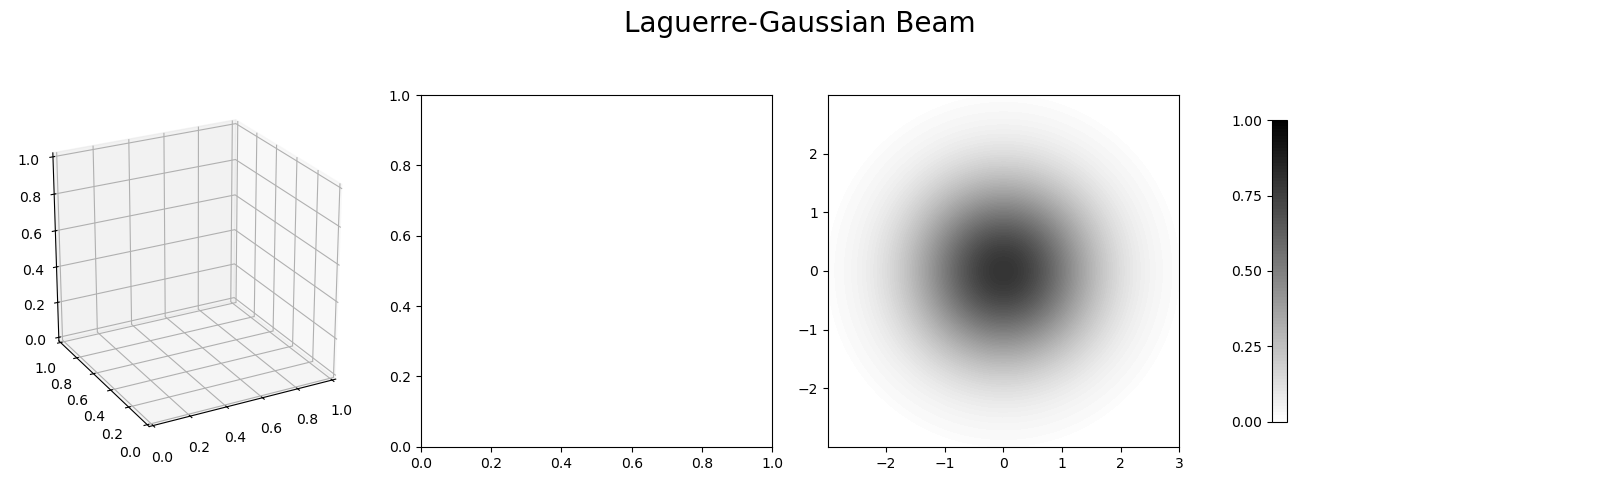

Output()

In [10]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
ax3D = fig.add_subplot(1, 4, 1, projection='3d')
fig.delaxes(ax[0])
fig.delaxes(ax[3])

beta = widgets.FloatSlider(value=0, min=0., max=1, step=1/100 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2, step=1/100 ,description='alpha (pi)')
t = np.arange(0, 2*np.pi, 0.02)
rho = np.linspace(0, 2*W, 200)
phi = np.linspace(0, 2*np.pi, 200)
rho, phi = np.meshgrid(rho, phi)
X, Y = rho*np.cos(phi), rho*np.sin(phi)
l = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)

ax3D.set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[2].set_aspect('equal', adjustable='box')

U, V = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
wx = np.cos(U) * np.sin(V)
wy = np.sin(U) * np.sin(V)
wz = np.cos(V)

o = np.linspace(0,2*np.pi,30, endpoint=True)
c = np.linspace(0, np.pi,15, endpoint=True)

def need(l,p,beta,alpha):
    beta = beta*np.pi
    alpha = alpha*np.pi
    ax3D.cla()
    ax[1].cla()
    ax[2].cla()

    ax3D.plot_wireframe(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.15])
    ax3D.plot_surface(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.05])
    
    qx =1*np.cos(alpha) * np.sin(beta)
    qy =1*np.sin(alpha) * np.sin(beta)
    qz =1*np.cos(beta)
    ax3D.quiver(0, 0, 0, qx, qy, qz, color=[0.547, 0.152, 0.996])
    ax3D.quiver(0, 0, 0, 0.3, 0, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0.3, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0, 0.3, color='k')

    ax3D.plot(np.sin(beta)*np.cos(o), np.sin(beta)*np.sin(o), np.cos(beta)+(o*0) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    ax3D.plot(np.sin(c)*np.cos(alpha), np.sin(c)*np.sin(alpha), np.cos(c) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    

    for i in np.linspace(0, 2*np.pi, 9, endpoint=True):
        for R in np.linspace(W/2, 2*W, 4 ,endpoint=True):
            x = R*np.cos(i)
            y = R*np.sin(i)
            a = np.cos(beta/2)*u(i,R,l,p)/np.sqrt(2)
            b = np.sin(beta/2)*np.exp(complex(0,1)*alpha)*u(i,R,l,p)/np.sqrt(2)
            ax[1].plot(x+a* np.exp(-complex(0,1)*w*t),y+b* np.exp(-complex(0,1)*w*t),linestyle=':',color="gray") 
            ax[1].arrow(float(x+a * np.exp(-complex(0,1)*w*t[-5])) , float(y+b * np.exp(-complex(0,1)*w*t[-5])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5]))) , float(b * (np.exp(-complex(0,1)*w*(t[-1]))-np.exp(-complex(0,1)*w*t[-5])))  ,
                        width=0.03,color="k" )  
            ax[1].arrow(float(x+a * np.exp(-complex(0,1)*w*t[0])) , float(y+b * np.exp(-complex(0,1)*w*t[0])) ,
                        float(a * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0]))) , float(b * (np.exp(-complex(0,1)*w*(t[5]))-np.exp(-complex(0,1)*w*t[0])))  ,
                        width=0.03,color="k" )

    ax[1].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 
    print('alpha=',format(alpha/np.pi,'.3f'),'𝜋 beta=',format(beta/np.pi,'.3f'),'𝜋' )

    conto = ax[2].contourf(X, Y, np.abs(u(phi,rho,l,p)), levels=np.linspace(0,1,100), cmap='gist_yarg' )
    ax[2].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 

    
    ax3D.text2D(0.05, 0.95, 'Poincaré sphere \nbeta='+str(format(beta/np.pi,'.2f'))+'$\pi$ alpha='+str(format(alpha/np.pi,'.2f'))+'$\pi$', transform=ax3D.transAxes)
    ax3D.text(0.3, 0, 0, "$\hat{x}$", color='k')
    ax3D.text(0, 0.3, 0, "$\hat{y}$", color='k')
    ax3D.text(0, 0, 0.3, "$\hat{z}$", color='k')
    ax3D.text(0, 0, 1.4, "|$\hat{\epsilon}^x$⟩", color='k')
    ax3D.text(0, 0, -1.4, "|$\hat{\epsilon}^y$⟩", color='k')
    ax3D.set_xlabel('x')
    ax3D.set_ylabel('y')
    ax3D.set_zlabel('z')
    ax3D.set_xlim(-1,1)
    ax3D.set_ylim(-1,1)
    ax3D.set_zlim(-1,1)
    x_major_locator=MultipleLocator(0.5)
    y_major_locator=MultipleLocator(0.5)
    z_major_locator=MultipleLocator(0.5)
    ax3D.xaxis.set_major_locator(x_major_locator)
    ax3D.yaxis.set_major_locator(y_major_locator)
    ax3D.zaxis.set_major_locator(z_major_locator)
    ax[1].legend()
    ax[1].set_title('real space polarization')
    ax[1].set_xlabel('x (um)')
    ax[1].set_ylabel('y (um)')
    ax[1].set_xlim(-2*W,2*W)
    ax[1].set_ylim(-2*W,2*W)
    ax[2].set_title('real space intensity')
    ax[2].set_xlabel('x (um)')
    ax[2].set_ylabel('y (um)')
    ax[2].set_xlim(-2*W,2*W)
    ax[2].set_ylim(-2*W,2*W)

plt.suptitle('Laguerre-Gaussian Beam' ,fontsize=20)
ax3D.view_init(24, -118, 0)                 #ax.view_init(elev, azim, roll)
plt.colorbar(ax[2].contourf(X, Y, np.abs(u(phi,rho,0,0)), levels=np.linspace(0,1,100), cmap='gist_yarg'),  ax=ax[3], ticks=np.linspace(0,1, 5), shrink=0.7, location='left')    
plt.tight_layout(pad=1)
plt.show()


out = widgets.interactive_output(need, {'l':l, 'p':p, 'beta':beta, 'alpha':alpha})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l,p]), widgets.Label('parameter:'), widgets.HBox([beta,alpha]) ])
display(ui , out )



# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令

In [11]:
#under the Coulomb gauge Frame






def uz(phi,rho,sigma,l,p):
    uz = complex(0,1) * (1 / (np.sqrt(2)*k*rho)) * ( (np.abs(l)-sigma*l) - (2*rho**2/(W**2)) ) * f(rho,l,p) * np.exp(complex(0,1)*(sigma+l)*phi)
    return uz







In [12]:
# def uz2(phi,rho,sigma,l,p):
#     uz2 = complex(0,1) * (1 / (np.sqrt(2)*k)) * ( (np.abs(l)-sigma*l)/rho - (2*rho/(W**2)) ) * f(rho,l,p) * np.exp(complex(0,1)*(sigma+l)*phi)
#     return uz2
l = 1
sigma = -1
p = 0
phi = 0
R = 1
# rho = 0
rho = np.power(0.1,100)
z = 0
t = 0
print('f =',f(rho,l,p))
print('uz =',np.abs(uz(phi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)))
# print('uz2 =',np.abs(uz2(phi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)))
print('front',complex(0,1)*(1 / (np.sqrt(2)*k))*( (np.abs(l)-sigma*l)/rho  -       0          ) * f(rho,l,p) * np.exp(complex(0,1)*(sigma+l)*phi)  )
print('back', complex(0,1)*(1 / (np.sqrt(2)*k))*(          0               -   (2*rho/(W**2)) ) * f(rho,l,p) * np.exp(complex(0,1)*(sigma+l)*phi)  )

f = 7.522527780636795e-101
uz = 0.08939883034205776
front 0.08939883034205776j
back -3.973281348535945e-202j


In [13]:
rho = np.sqrt((np.abs(l)-sigma*l) * (W**2)/2 )
print('when l = ',l,'and sigma =',sigma,'\nwhen rho =', rho,'the uz value is', uz(phi,rho,sigma,l,p) )

when l =  1 and sigma = -1 
when rho = 1.5 the uz value is 0j


In [14]:
for i in range(10):
    rho /= 10
    print('for rho =', format(rho, '.1E'))
    print('    In bracket =', ( (np.abs(l)-sigma*l)/rho - (2*rho/(W**2)) ) ,'\n    f part =',f(rho,l,p))
    if ( ((np.abs(l)-sigma*l)/rho) - (2*rho/(W**2)) )>f(rho,l,p):
        print('        bracket part is more important then f(rho,l,p) about',format( (((np.abs(l)-sigma*l)/rho)-(2*rho/(W**2)))/f(rho,l,p), ".1E")  , 'times\n------------------------------')
    else :
        print('        bracket part seems NOT that important ,\nthe differance is about',format( (((np.abs(l)-sigma*l)/rho)-(2*rho/(W**2)))/f(rho,l,p) , ".1E")  , 'times\n------------------------------')
print('the difference is about',format( ( (((np.abs(l)-sigma*l)/rho)-(2*rho/(W**2)))/f(rho,l,p) )-( (((np.abs(l)-sigma*l)/1)-(2*1/(W**2)))/f(1,l,p) ),'.1E'),'times of the difference when rho = 1')

for rho = 1.5E-01
    In bracket = 13.200000000000001 
    f part = 0.11171516067889371
        bracket part is more important then f(rho,l,p) about 1.2E+02 times
------------------------------
for rho = 1.5E-02
    In bracket = 133.32000000000002 
    f part = 0.011282663348205109
        bracket part is more important then f(rho,l,p) about 1.2E+04 times
------------------------------
for rho = 1.5E-03
    In bracket = 1333.3319999999999 
    f part = 0.0011283780387169099
        bracket part is more important then f(rho,l,p) about 1.2E+06 times
------------------------------
for rho = 1.5E-04
    In bracket = 13333.3332 
    f part = 0.00011283791558117211
        bracket part is more important then f(rho,l,p) about 1.2E+08 times
------------------------------
for rho = 1.5E-05
    In bracket = 133333.33331999998 
    f part = 1.128379166982675e-05
        bracket part is more important then f(rho,l,p) about 1.2E+10 times
------------------------------
for rho = 1.5E-06
    In brack

### $becuase\, f\, have\, a\, part:\;  ( \frac{\sqrt{2}\rho}{W})^l\;\;  in\, side\,,\, so\, the\, value\, won't\, goes\, to\, infinite\, when\, l\, =\, 1\,$

### $and\, will\, be\, 0\, when\,\; l\,>=\, 1\,$

Output()

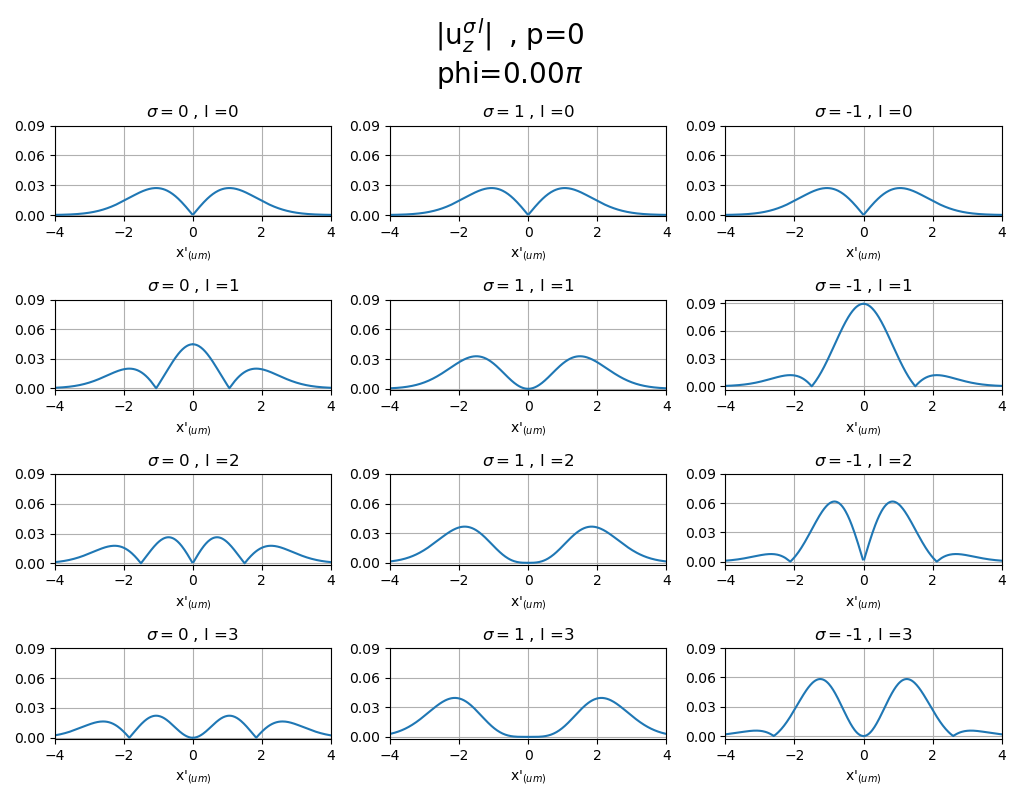

In [15]:
#LGbeam產生器

l = np.array([0, 1, 2, 3])
sigma = np.array([0, 1, -1])
fig, ax = plt.subplots(len(l),len(sigma),figsize=(3.4*len(sigma), 2*len(l)))
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
angle = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='phi (pi)')
z = 0
R = 4 #um
W = 1.5 #um(10**-6m) Beam waist
R = 4   #um(10**-6m) 徑向距離
rho = np.linspace(0, R, 201, endpoint=True)

def CoulombgaugeLGbeam(angle,p):
    phi = angle*np.pi
    
    for s in range(len(sigma)):
        for q in range(len(l)):
            ax[q,s].cla()
            ax[q,s].set_title('$\sigma = $'+str(sigma[s])+' , l ='+str(l[q]))
            ax[q,s].plot(rho, np.abs(uz(phi,rho,sigma[s],l[q],p)*np.exp(complex(0,1)*k*z)), color='#1f77b4')
            ax[q,s].plot(-rho, np.abs(uz(phi+np.pi,rho,sigma[s],l[q],p)*np.exp(complex(0,1)*k*z)), color='#1f77b4')
            
            ax[q,s].set_xlabel('x\'$_{(um)}$')
            # ax[q,s].set_ylim(0,0.09)
            ax[q,s].set_xlim(-R,R)
            ax[q,s].set_yticks(ticks=np.arange(0,0.12,0.03))
            ax[q,s].grid()
    plt.suptitle('|u$_{z}^{\sigma\,l}|\;\;$, p='+str(p)+'\nphi='+str(format(phi/np.pi,'.2f'))+'$\pi$', fontsize=20)

out = widgets.interactive_output(CoulombgaugeLGbeam, {'angle':angle, 'p':p})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([p]), widgets.Label('parameter:'), widgets.HBox([angle]) ])
display(ui , out )

plt.tight_layout(pad=1)
plt.show()

Output()

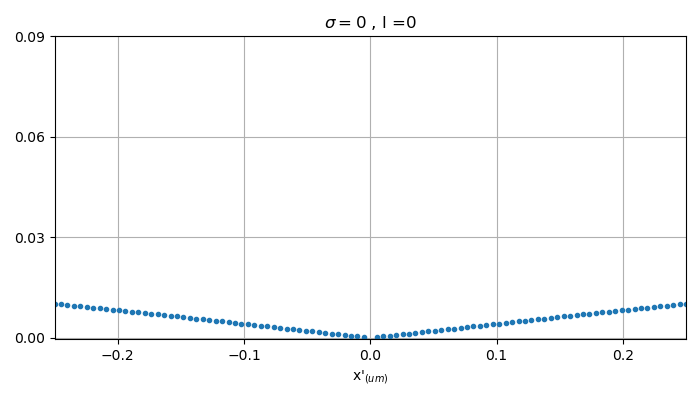

In [16]:
fig, ax = plt.subplots(figsize=(7, 4))
angle = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='phi (pi)')
l = widgets.IntText(value=0, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
sigma = widgets.IntText(value=0, min=0, max=10, step=1, description='sigma:', disabled=False)
t = widgets.FloatSlider(value=0, min=0., max=T, step=T/32 ,description='t (ps)',readout_format='.2f')
z = 0
R = 4 #um
W = 1.5 #um(10**-6m) Beam waist
R = 0.25   #um(10**-6m) 徑向距離
rho = np.linspace(0, R, 50)

def CoulombLGbeam(angle,sigma,l,p,t):
    phi = angle*np.pi
    ax.cla()
    ax.set_title('$\sigma = $'+str(sigma)+' , l ='+str(l))
    ax.plot(rho, np.abs(uz(phi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)) , '.', color='#1f77b4')
    ax.plot(-rho, np.abs(uz(phi+np.pi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)) , '.', color='#1f77b4')
    
    ax.set_xlabel('x\'$_{(um)}$')
    # ax.set_ylim(0,0.09)
    ax.set_xlim(-R,R)
    ax.set_yticks(ticks=np.arange(0,0.12,0.03))
    ax.grid()
    # plt.suptitle('|u$_{z}^{\sigma\,l}|\;\;$, p='+str(p)+'\nphi='+str(format(phi/np.pi,'.2f'))+'$\pi$', fontsize=20)

out = widgets.interactive_output(CoulombLGbeam, {'angle':angle,'sigma':sigma, 'l':l, 'p':p , 't': t })
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([sigma,l,p]), widgets.Label('parameter:'), widgets.HBox([angle,t]) ])
display(ui , out)

plt.tight_layout(pad=1)
plt.show()

Output()

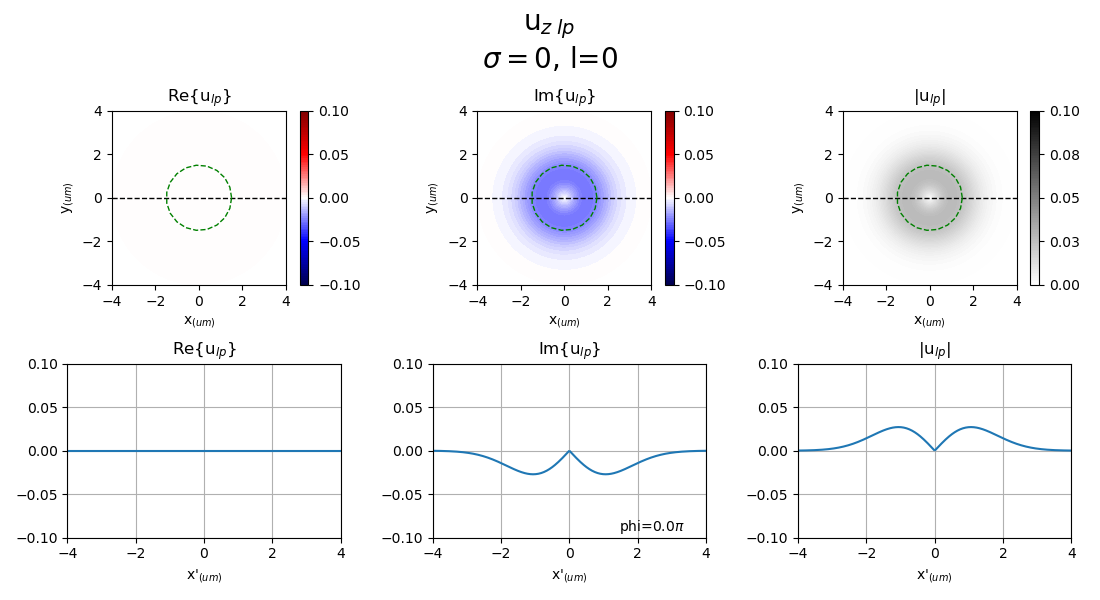

In [17]:
angle = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='phi (pi)')
l = widgets.IntText(value=0, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
sigma = widgets.IntText(value=0, min=0, max=10, step=1, description='sigma:', disabled=False)
t = widgets.FloatSlider(value=0, min=0., max=T, step=T/32 ,description='t (ps)',readout_format='.2f')
trigger = widgets.Button(description='animate(t)')
z = 0

fig, ax = plt.subplots(2,3,figsize=(11, 6))
for s in range(0,3):
    ax[0,s].set_aspect('equal', adjustable='box')
    ax[0,s].set_box_aspect(1)
#輸入1D資料
W = 1.5 #um(10**-6m) Beam waist
R = 4   #um(10**-6m) 徑向距離
linestep = np.linspace(-R, R, 51)
rho = np.linspace(0, R, 200)
phi = np.linspace(0, 2*np.pi, 200)
#計算2D資料
rho, phi = np.meshgrid(rho, phi)
x, y = rho*np.cos(phi), rho*np.sin(phi)


#存圖函數
def animatet(b):
    for i in range(len(I)):
        t.value = I[i]
        plt.savefig('combine_{}.png'.format(i),bbox_inches='tight',dpi=300)
        

#LGbeam實像虛像絕對值產生器
def generateLGbeam(angle,sigma,l,p,t):
    angle = angle*np.pi
    plt.suptitle('u$_{z\;lp}$ \n$\sigma = $'+str(sigma)+', l='+str(l) ,fontsize=20)
    
    #2D徑軸關係函數
    def plt2d(q,s,world):
        ax[q,s].cla()
        if world=='real':
            ax[q,s].set_title('Re{u$_{lp}$}')
            ax[q,s].plot(rho[0], np.real(uz(angle,rho[0],sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)),color='#1f77b4')
            ax[q,s].plot(-rho[0], np.real(uz(angle+np.pi,rho[0],sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)),color='#1f77b4')
        elif world=='img':
            ax[q,s].set_title('Im{u$_{lp}$}')
            ax[q,s].plot(rho[0], np.imag(uz(angle,rho[0],sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)),color='#1f77b4')
            ax[q,s].plot(-rho[0], np.imag(uz(angle+np.pi,rho[0],sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)),color='#1f77b4')
            ax[q,s].annotate("phi="+str(angle/np.pi)+"$\pi$ ", xy=(0.68, 0.04),xycoords=ax[q,s])
        elif world=='abs':
            ax[q,s].set_title('|u$_{lp}$|')
            ax[q,s].plot(rho[0],  np.abs(uz(angle,rho[0],sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)),color='#1f77b4')
            ax[q,s].plot(-rho[0],  np.abs(uz(angle+np.pi,rho[0],sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)),color='#1f77b4')
        ax[q,s].set_xticks(ticks=np.arange(-R,R+2,2))
        ax[q,s].set_yticks(ticks=np.arange(-0.1,0.15,0.05))
        ax[q,s].set_ylim(-0.1,0.1)
        ax[q,s].set_xlim(-R,R)
        ax[q,s].set_xlabel("x'$_{(um)}$")
        ax[q,s].grid()



    #3D整體關係函數
    def plt3d(q,s,world):
        ax[q,s].cla()
        if world=='real':
            contourreal=ax[q,s].contourf(x, y, np.real(uz(phi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)), levels=np.linspace(-0.1,0.1,100), cmap='seismic')
            ax[q,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[q,s].set_title('Re{u$_{lp}$}')
        elif world=='img':
            contourimg=ax[q,s].contourf(x, y, np.imag(uz(phi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)), levels=np.linspace(-0.1,0.1,100), cmap='seismic')
            ax[q,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[q,s].set_title('Im{u$_{lp}$}')
        elif world=='abs':
            contourabs=ax[q,s].contourf(x, y, np.abs(uz(phi,rho,sigma,l,p)*np.exp(complex(0,1)*k*z)*np.exp((0-1j)*w*t)), levels=np.linspace(0,0.1,100), cmap='gist_yarg')
            ax[q,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[q,s].set_title('|u$_{lp}$|')
        ax[q,s].plot(W*np.cos(np.linspace(0, 2*np.pi, 20)),W*np.sin(np.linspace(0, 2*np.pi, 20)),linewidth=1, linestyle='--', color='g')
        ax[q,s].set_aspect('equal', adjustable='box')
        ax[q,s].set_box_aspect(1)
        ax[q,s].set_ylim(-R,R)
        ax[q,s].set_xlim(-R,R)
        ax[q,s].set_xlabel('x$_{(um)}$')
        ax[q,s].set_ylabel('y$_{(um)}$')
        ax[q,s].set_xticks(ticks=np.arange(-4,6,2))
        ax[q,s].set_yticks(ticks=np.arange(-4,6,2))


    #繪圖
    plt2d(1,0,'real')
    plt2d(1,1,'img')
    plt2d(1,2,'abs')
    plt3d(0,0,'real')
    plt3d(0,1,'img')
    plt3d(0,2,'abs')
    

fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-0.1,0.1,100), cmap='seismic'), ax=ax[0,0], format="{x:.2f}", ticks=np.linspace(-0.1,0.1, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-0.1,0.1,100), cmap='seismic'), ax=ax[0,1], format="{x:.2f}", ticks=np.linspace(-0.1,0.1, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(0,0.1,100), cmap='gist_yarg'), ax=ax[0,2], format="{x:.2f}", ticks=np.linspace(0,0.1, 5))

#滑桿控制 
trigger.on_click(animatet)
out3D = widgets.interactive_output(generateLGbeam, {'angle':angle,'sigma':sigma, 'l':l, 'p':p , 't': t })
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([sigma,l,p]), widgets.Label('parameter:'), widgets.HBox([angle,t]), widgets.HBox([trigger])])
display(ui , out3D)

plt.tight_layout()
plt.show()    

In [15]:
# print( rho[0], uz(0,rho[0],1,1,0) )